In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")

In [3]:
train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [4]:
features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [5]:
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


# EDA

## stores.csv

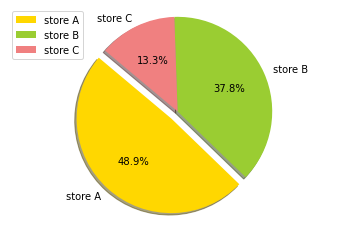

In [6]:
#pie-chart for the visual representation of store types
#https://pythonspot.com/matplotlib-pie-chart/
# Data to plot
value, counts  = np.unique(stores['Type'], return_counts= True)
labels = 'store A','store B','store C'
sizes = list(counts/sum(counts))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

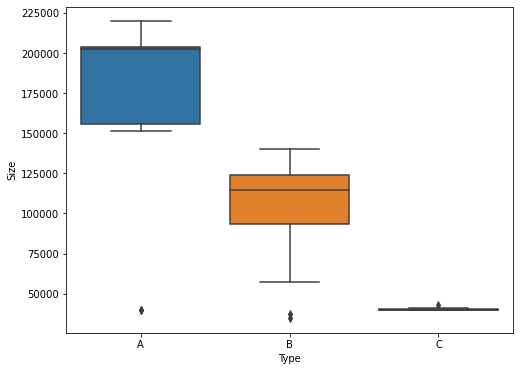

In [7]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)


In [8]:
# Some proof to suggest store types don't overlap and possibly use either one of  store Type or Size. 

## train.csv

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
train['Date'] =  pd.to_datetime(train['Date'])

<AxesSubplot:xlabel='IsHoliday'>

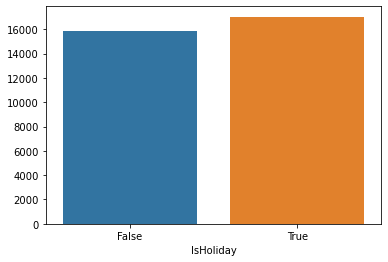

In [11]:
# sales vs holiday

sns.barplot(data = train, x= train.groupby('IsHoliday')['Weekly_Sales'].mean().index, y = train.groupby('IsHoliday')['Weekly_Sales'].mean().values)


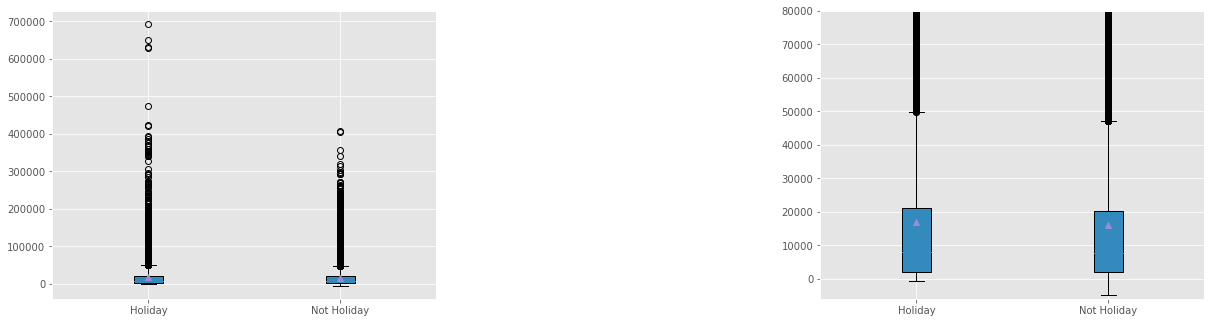

In [12]:
# boxplot for sizes of types of stores
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']


axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True)

axes[1].set_ylim(-6000,80000)

plt.show()

In [13]:
# Avg sales on holidays is a little more 
# Few Outliers in Holiday = "True"

4 2011-09-11 00:00:00
5 2011-09-12 00:00:00
8 2012-11-23 00:00:00
11 2012-12-28 00:00:00


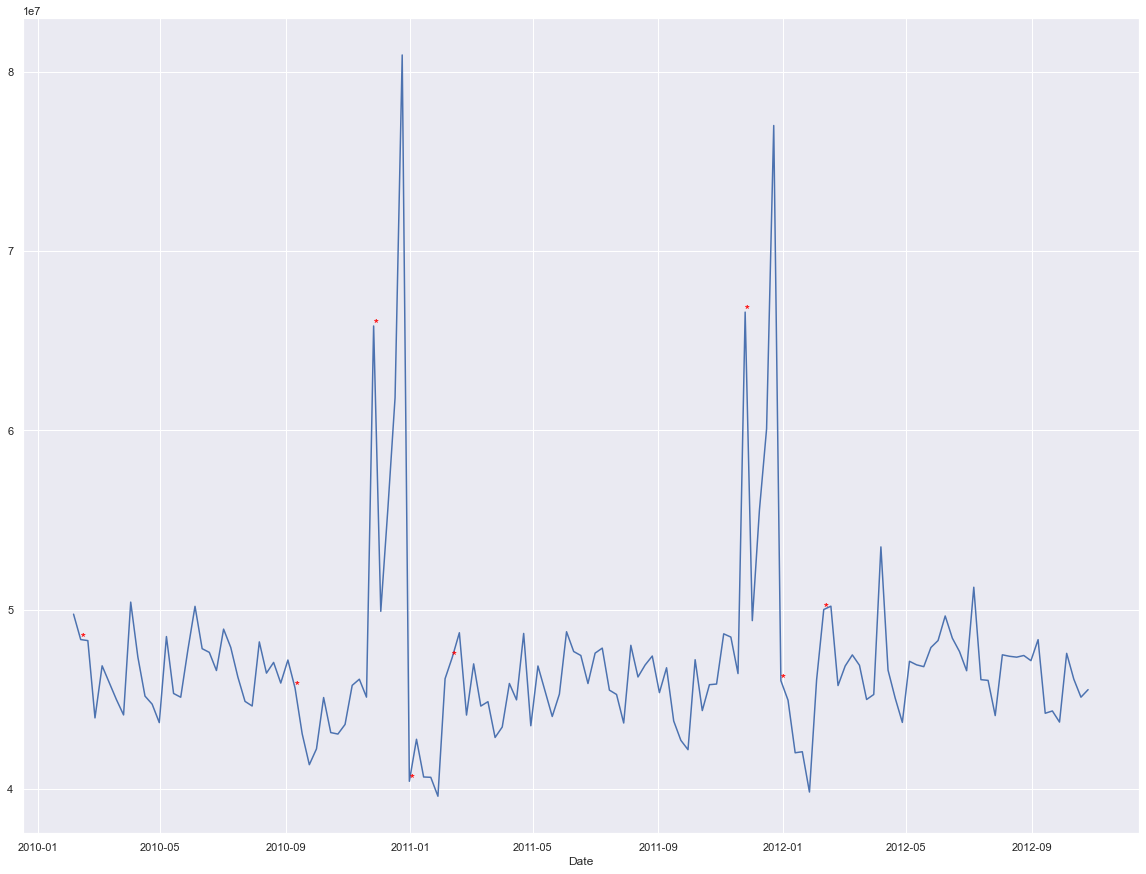

In [14]:
super_bowl_week = ['2010-02-12', '2011-02-11', '2012-02-10']#, '2013-02-8']
labor_day_week = ['2010-09-10', '2011-09-11', '2011-09-12']#,'2013-09-06']
thanksgiving_week = ['2010-11-26','2011-11-25','2012-11-23']#','2013-11-29']
christmas_week = ['2010-12-31','2011-12-30','2012-12-28']#,'2013-12-27']

holiday_weeks = pd.to_datetime(super_bowl_week + labor_day_week +thanksgiving_week+christmas_week)

train.groupby(['Date'])['Weekly_Sales'].sum().index
sns.set(rc={"figure.figsize":(20, 15)})
x_axis = train.groupby(['Date'])['Weekly_Sales'].sum().index
y_axis = train.groupby(['Date'])['Weekly_Sales'].sum().values
sns.lineplot( x = x_axis, y = y_axis,ci = False)
for pos, value in enumerate(holiday_weeks):
    try:
        plt.text(value,y_axis[np.where(np.array(x_axis) == holiday_weeks[pos])[0][0]] , "*", horizontalalignment='left', size='medium', color='red', weight='bold')
    except:
        print(pos, value)
        
   
    
plt.show()


<AxesSubplot:xlabel='Dept'>

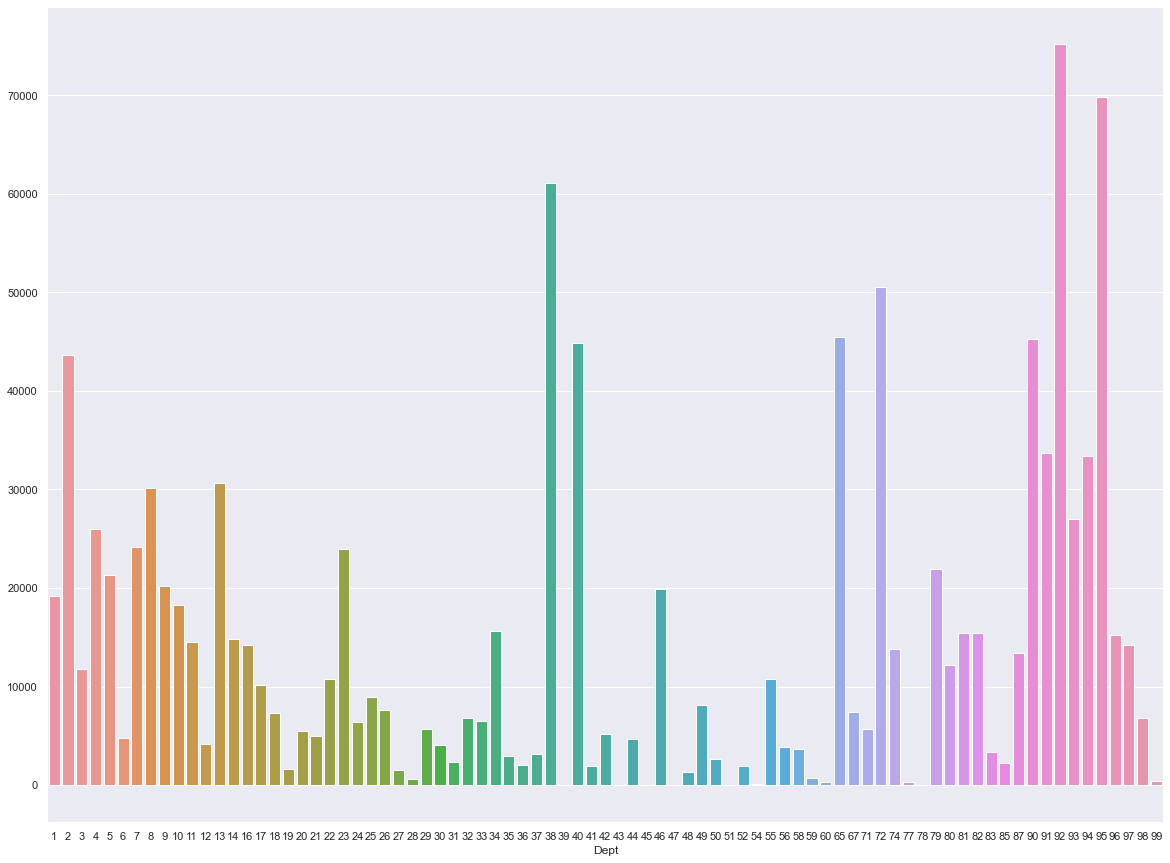

In [15]:
# Mean sales vs department
x_axis = train.groupby(['Dept'])['Weekly_Sales'].mean().index
y_axis = train.groupby(['Dept'])['Weekly_Sales'].mean().values

sns.barplot(x = x_axis , y = y_axis)

In [16]:
# Departments like 39,43,45,47 .., have very low average weekly sales.
# Departments numbers 65 to 95 have higher weekly sales comparred to other departments.

In [17]:
# Combining DataFrames 

df = pd.merge(train, stores, how = 'inner', on = 'Store')
features['Date'] = pd.to_datetime(features['Date'])
df = pd.merge(df , features, how = 'inner', on = ['Store','Date','IsHoliday'])

<AxesSubplot:xlabel='Store'>

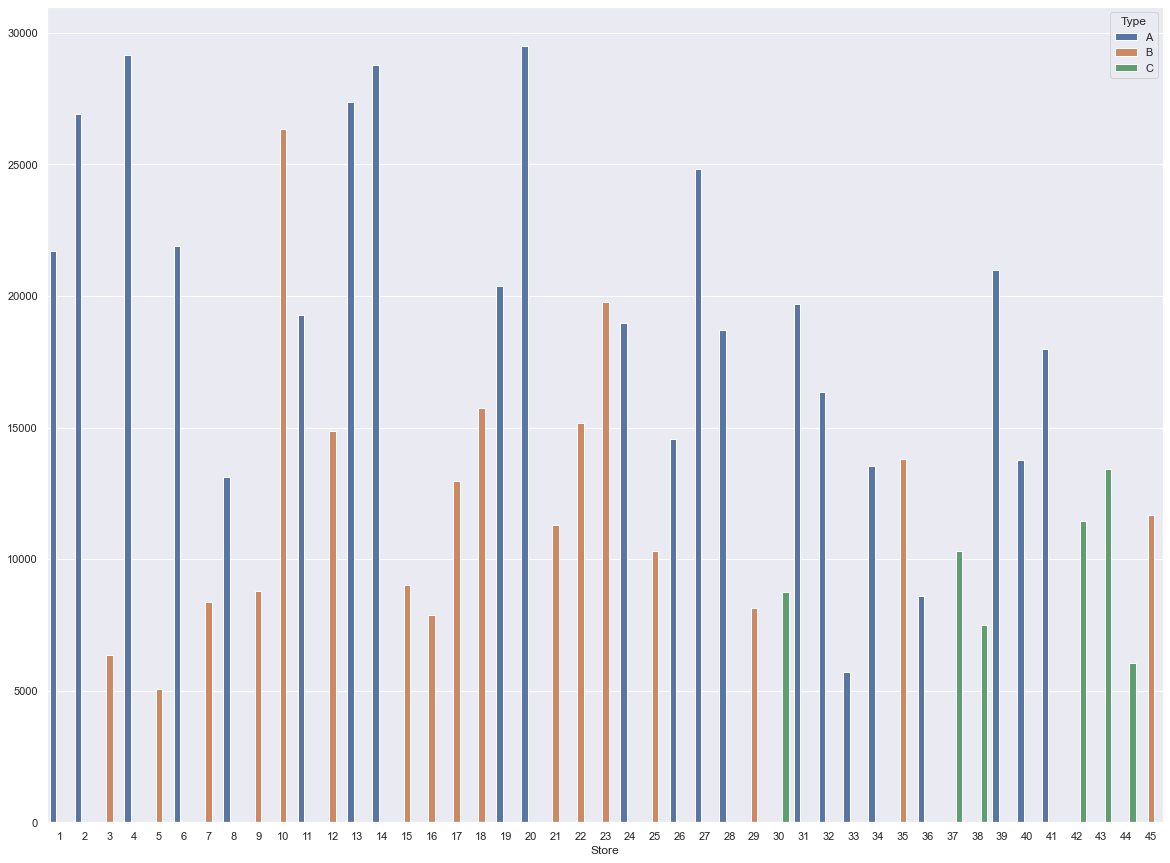

In [18]:
# Mean sales vs store
x_axis = train.groupby(['Store'])['Weekly_Sales'].mean().index
y_axis = train.groupby(['Store'])['Weekly_Sales'].mean().values

sns.barplot(x = x_axis , y = y_axis, hue= stores['Type'])

# TODO: Month wise sales 

In [19]:
# Store Type = A has more sales followed B and C.

# Data Cleaning

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [21]:
# OUTLIERS 
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [22]:
# Based on the above statistics weekly sales have few neagtive values. (elaborate)

In [23]:
df[df['Weekly_Sales'] <0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
188,1,47,2010-02-19,-863.00,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
406,1,47,2010-03-12,-698.00,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
2549,1,47,2010-10-08,-58.00,False,A,151315,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838
3632,1,54,2011-01-21,-50.00,False,A,151315,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742
4419,1,47,2011-04-08,-298.00,False,A,151315,67.84,3.622,NaN,NaN,NaN,NaN,NaN,215.074394,7.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,2012-05-18,-3.97,False,B,118221,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,190.996448,8.567
420066,45,49,2012-05-25,-4.97,False,B,118221,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567
420403,45,49,2012-06-29,-34.00,False,B,118221,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567
420736,45,49,2012-08-03,-1.91,False,B,118221,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684


In [24]:
# Null Values 

df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [25]:
# Filling the 'NaN' in Markdown columns to 0
df.fillna(0, inplace = True)

In [26]:
# Extracting features out of Date.
df['Month'] = df['Date'].dt.month_name()
df['WeekNumber'] = df['Date'].dt.week
df['Year'] = df['Date'].dt.year

In [27]:
# Rearanging columns i.e Placing Weekly_Sales at the last.
Weekly_Sales = df.pop("Weekly_Sales")

# insert column with insert(location, column_name, column_value)

df.insert(df.shape[1], "Weekly_Sales", Weekly_Sales)


In [28]:
# df.to_csv("trainMerged.csv", index = False)

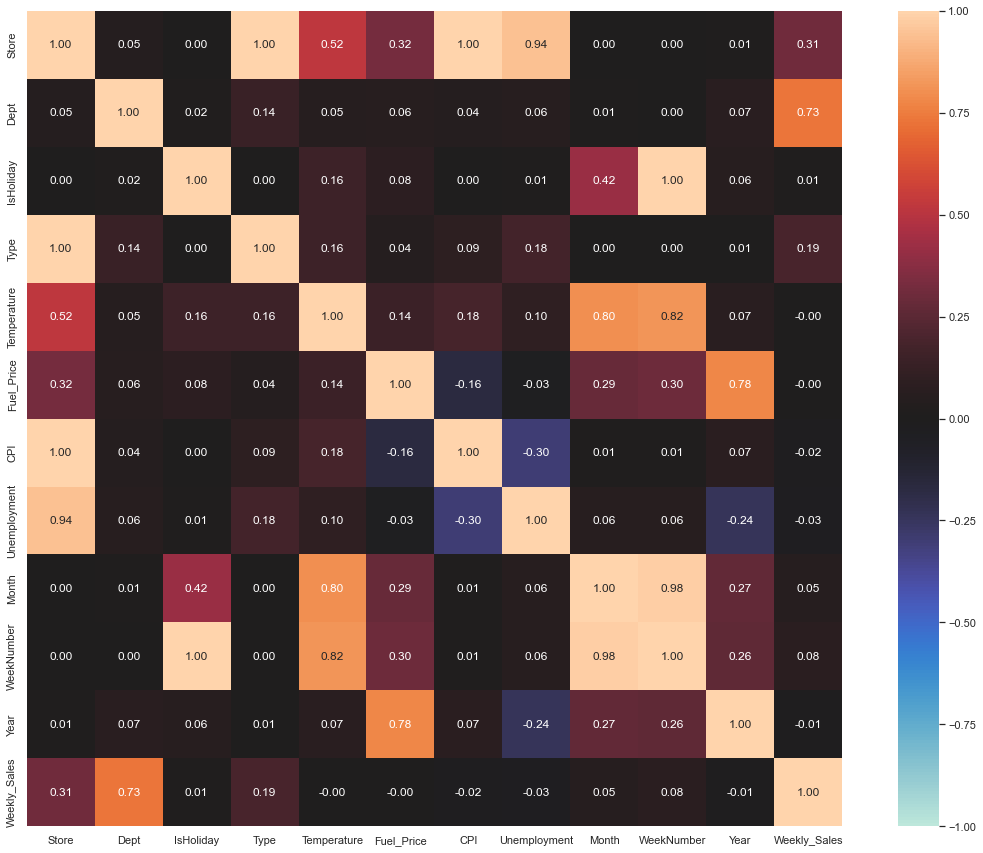

In [29]:
from dython import nominal

df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date','Size'], inplace = True)
nominal.associations(df, nominal_columns=['Store','Dept','IsHoliday','Type','Month','WeekNumber'])
plt.show()

In [30]:
# Dopping columns 'Temperature' and 'Fuel Price' based on 0 correlation with weekly sales 

df.drop(columns =['Temperature','Fuel_Price'], inplace = True)

In [31]:
# Label Encoding 'Type'
# df['Type'] = df['Type'].map({'A':3, 'B':2, 'C':1})

In [32]:
# Converting columns to categorical dtype .

cols_to_convert = ['Store','Dept','IsHoliday', 'Month', 'WeekNumber','Type']

for col in cols_to_convert:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Dept          421570 non-null  category
 2   IsHoliday     421570 non-null  category
 3   Type          421570 non-null  category
 4   CPI           421570 non-null  float64 
 5   Unemployment  421570 non-null  float64 
 6   Month         421570 non-null  category
 7   WeekNumber    421570 non-null  category
 8   Year          421570 non-null  int64   
 9   Weekly_Sales  421570 non-null  float64 
dtypes: category(6), float64(3), int64(1)
memory usage: 18.5 MB


In [33]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [34]:
X = df_dummies.drop('Weekly_Sales' , axis = 1)
y = df_dummies['Weekly_Sales']

# Modelling 

`Metrics = Weighted Mean Absoulute Error` \
`Validation = K- Fold Validation - i.e 5 Fold`

## Train/ Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=54)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler



def find_wmae(model, X_test, y_test, norm = False):
    weights = np.where(X_test['IsHoliday_True'] == 1, 5, 1)
    y_pred = model.predict(X_test)
    wmae = np.sum((weights * np.absolute(y_test - y_pred)))/ np.sum(weights)
    r2 = r2_score(y_test, y_pred)
    return {"wmae": wmae, "r2_score":r2}



## Regression

### Linear Regression 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
print(find_wmae(LinearReg, X_test, y_test))

{'wmae': 8278.412784486693, 'r2_score': 0.666456095119248}


### Lasso 

In [41]:
from sklearn.linear_model import Lasso
LassoReg = Lasso()
LassoReg.fit(X_train, y_train)
print(find_wmae(LassoReg, X_test, y_test))

{'wmae': 8260.912685436408, 'r2_score': 0.6662565404856111}


### Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
RidgeReg = Ridge()
RidgeReg.fit(X_train, y_train)
print(find_wmae(RidgeReg, X_test, y_test))

{'wmae': 8277.489418090543, 'r2_score': 0.666459909985732}


# Tree Based Regression

## Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

DTReg =  DecisionTreeRegressor(random_state=54)
DTReg.fit(X_train, y_train)
print(find_wmae(DTReg, X_test, y_test))


{'wmae': 1981.7296496986555, 'r2_score': 0.9432372238238076}


## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

RFReg =  RandomForestRegressor(random_state=54)
RFReg.fit(X_train, y_train)
print(find_wmae(RFReg, X_test, y_test))

{'wmae': 1782.9569730737132, 'r2_score': 0.9602421919824752}


## XGBoost Regressor

In [45]:
from lightgbm import LGBMRegressor

xgbReg = LGBMRegressor(random_state=54)
xgbReg.fit(X_train,y_train)
print(find_wmae(xgbReg, X_test, y_test))

{'wmae': 5030.8009747668175, 'r2_score': 0.8785078952438976}


In [46]:
# plt.figure(figsize=(10,7))
# feat_importances = pd.Series(bestXGB.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(30).plot(kind='barh');

## Extra Tree Regressor

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

etReg =  ExtraTreesRegressor(random_state=54)
etReg.fit(X_train,y_train)
print(find_wmae(etReg, X_test, y_test))

{'wmae': 1689.285468290218, 'r2_score': 0.956266230763849}


In [48]:
# Hyper Parameter Tuning for best Parameter in RF

In [49]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 54,
 'verbose': 0,
 'warm_start': False}

# Best Parameter

In [104]:
# from sklearn.model_selection import RandomizedSearchCV

# RF= RandomForestRegressor()

# params = [{ 'max_depth': list(range(15, 20)), 
#             'n_estimators': [700, 800, 900, 1000,1200,1300,1500],
#             'bootstrap' :[True, False],
#             'max_features' : ['auto']}]
# bestRF= RandomizedSearchCV(RF, params, cv = 3, scoring='r2')
# bestRF.fit(X_train, y_train)

In [50]:
def test_preprocessing(data):
    data['Date'] =  pd.to_datetime(data['Date'])

    df_test = pd.merge(data, stores, how = 'inner', on = 'Store')
    df_test = pd.merge(df_test , features, how = 'inner', on = ['Date','Store','IsHoliday'])

    submission_id = df_test['Store'].astype(str)+'_'+df_test['Dept'].astype(str)+'_'+df_test['Date'].astype(str)

    df_merged = df_test.copy()

    df_test['CPI']=df_test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
    df_test['Unemployment']=df_test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

    df_test['Month'] = df_test['Date'].dt.month_name()
    df_test['WeekNumber'] = df_test['Date'].dt.week
    df_test['Year'] = df_test['Date'].dt.year

    df_test.to_csv("testMerged.csv", index= False)

    df_test.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date','Size','Temperature','Fuel_Price'], inplace = True)

    # df['Type'] = df['Type'].map({'A':3, 'B':2, 'C':1})


    for col in cols_to_convert:
        df_test[col] = df_test[col].astype('category')

    df_dummies_test = pd.get_dummies(df_test,drop_first=True)
    

    train_cols = X_train.columns.tolist()
    
    test_cols = df_dummies_test.columns.tolist()

    missing_columns = list(set(train_cols)-set(test_cols))

    print(missing_columns)

    for col in missing_columns:
        df_dummies_test[col] = 0

    x_test =  df_dummies_test[train_cols]
    
    return x_test, submission_id

In [51]:
testData = pd.read_csv("test.csv")
test, submission_id= test_preprocessing(testData)


['WeekNumber_31', 'WeekNumber_40', 'WeekNumber_38', 'WeekNumber_39', 'Month_October', 'WeekNumber_43', 'WeekNumber_41', 'WeekNumber_32', 'Month_September', 'WeekNumber_37', 'WeekNumber_33', 'WeekNumber_34', 'WeekNumber_36', 'Month_August', 'WeekNumber_35', 'WeekNumber_42']


In [55]:
models = [LinearReg, LassoReg, RidgeReg, DTReg, RFReg, xgbReg, etReg]

for model in models:
    y_pred = model.predict(test)
    submission = pd.read_csv("sampleSubmission.csv")
    submission['Weekly_Sales'] = y_pred
    submission['Id'] = submission_id
    # if model != bestRF:
    #     submission.to_csv(f"bestRF_submission.csv",index = False)
    # else:
    #     submission.to_csv(f"{str(model)}_submission.csv",index = False)

    submission.to_csv(f"{str(model)}__submission.csv",index = False)

In [ ]:
submission

,Id,Weekly_Sales
0,1_1_2012-11-02,29354.03
1,1_2_2012-11-02,17978.28
2,1_3_2012-11-02,708.15
3,1_4_2012-11-02,16763.10
4,1_5_2012-11-02,905.52
...,...,...
115059,45_93_2013-07-26,22465.11
115060,45_94_2013-07-26,25609.43
115061,45_95_2013-07-26,52894.72
115062,45_97_2013-07-26,18054.64


In [ ]:
results_dict = {'Linear': {'mae': 8250.412784486693, 'r2':0.666056095119248, 'Kaggle Score': ""},
'Lasso': {'mae': 8288.912685436408, 'r2':0.6666565404856111, 'Kaggle Score':"" },
'Ridge': {'mae': 8277.489418090543, 'r2':0.666459909985732, 'Kaggle Score':"" },
'DecisionTree': {'mae': 1981.7296496986555, 'r2':9432372238238076, 'Kaggle Score': ""},
'RandomForest': {'mae': 1782.9569730737132, 'r2':0.9602421919824752, 'Kaggle Score': ""},
'XGBoost': {'mae': 5030.8009747668175 ,'r2':0.8785078952438976, 'Kaggle Score': ""},
'ExtraTree': {'mae': 1689.285468290218, 'r2':0.956266230763849, 'Kaggle Score': ""},
'bestRF': {'mae': 8278.412784486693, 'r2':"", 'Kaggle Score': ""}}

In [ ]:
res

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
bestModel = ExtraTreesRegressor(n_estimators = 1000, bootstrap=True, criterion='mae', max_depth=25)
bestModel.fit(X_train,y_train)
print(find_wmae(bestModel, X_test, y_test))